In [102]:
import matplotlib
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, yt
from Convenience import *
from time import time
from yt.units import speed_of_light_cgs as speed_of_light

Text(0,0.5,u'$D_{eff} = D_L D_{LS} / D_S$ / Gpc')

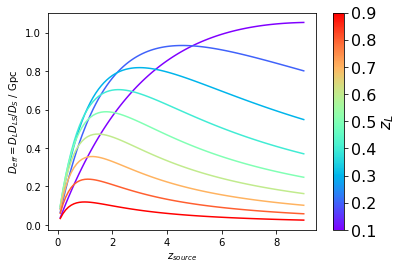

In [290]:
z_s = np.arange(0.1,9.1,0.1)
es = np.arange(0.1,1.0,0.1)
for e, color in zip(es, rainbow(np.linspace(0,1,es.size))):
    z_L = e*z_s
    d = Deff( z_L=z_L, z_s=z_s )
    plt.plot(z_s,d, label=r"$\epsilon$ = %.1f " % e, color=color )
Colorbar(es, label=r"$z_L$")
plt.xlabel(r"$z_{source}$")
plt.ylabel(r"$D_{eff} = D_L D_{LS} / D_S$ / Gpc")

Text(0,0.5,u'$D_{\\rm eff} = D_L D_{LS} / D_S$')

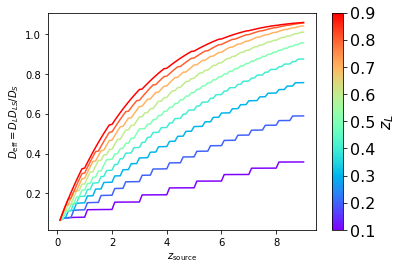

In [281]:
z_s = np.arange(0.1,9.1,0.1)
es = np.arange(0.1,1.0,0.1)
for e, color in zip(es, rainbow(np.linspace(0,1,es.size))):
    z_L = e*z_s
    d = Deff_( z_L=z_L, z_s=z_s )
    plt.plot(z_s,d, label=r"$\epsilon$ = %.1f " % e, color=color )
Colorbar(es, label=r"$z_L$")
plt.xlabel(r"$z_{\rm source}$")
plt.ylabel(r"$D_{\rm eff} = D_L D_{LS} / D_S$ / Gpc")

In [291]:


zs = np.arange(0.1,7.1,0.1)
zL = np.arange(0.0,7.1,0.1)

'''  we table Deff for faster use with IGM and intervening galaxies
deff = np.zeros([z_s.size,z_L.size])
for i_s, zs in enumerate(z_s):
    deff[i_s] = Deff( zs, z_L )

np.save( 'Deff.npy', deff)
#deff = np.load( 'Deff.npy' )
#'''

deff = np.load( 'Deff.npy' )
def Deff_( z_s=np.array(1.0), z_L=np.array(0.5) ):
    i_s = np.searchsorted( zs, z_s )
    i_L = np.searchsorted( zL, z_L )
    return deff[i_s,i_L]

    


0 3 3
1 4 4
2 5 5
3 6 6
4 7 7
5 8 8


1303445469.5652173

Here we show, that we can always use equations in Marcquardt & Koay 2013 for the case $r_{\rm diff} > l_0$ 

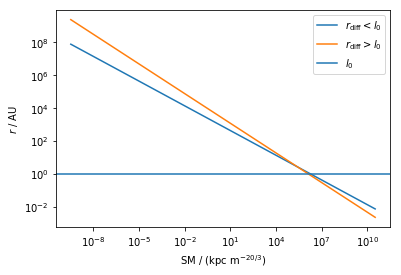

In [288]:
lambda_0 = 0.23 # m
#lambda_0 = 0.50 # m
l_0 = 1.496e11  # m  == 1 AU
kpc2m = 3.086e19 # m

SM_unit = 3.241e-8 # kpc m^-20/3 to 10^12 m^-17/3

## range of possible SM_eff 
SM_eff = 10.**np.linspace(10,30,100)/kpc2m ## kpc m^-20/3

#r_lo = ( 8e9 * lambda_0**-1 * (SM_unit*SM_eff)**-0.5 )**1.2 ## r < l_0, 
r_lo = 8e9 * lambda_0**-1 * (SM_unit*SM_eff)**-0.5  ## r < l_0, 
r_hi = 3.7e9 * lambda_0**-1.2 * (SM_unit*SM_eff)**-0.6      ## r > l_0

plt.loglog( SM_eff, r_lo/l_0, label=r"$r_{\rm diff} < l_0$" )
plt.plot( SM_eff, r_hi/l_0, label=r"$r_{\rm diff} > l_0$" )
plt.axhline(y=l_0/l_0, label=r"$l_0$")
plt.ylabel('$r$ / AU')
plt.xlabel('SM / (kpc m$^{-20/3}$)')
plt.legend()



For $\lambda = 0.23$ m, the $r_{diff}<l_0$ equations are valid, where the blue line is below $l_0 = 1$ AU.  The $r_{diff}>l_0$ equations are valid, where the orange line is above $l_0 = 1$ AU. Clearly, the latter is the case for all reasonable contributions to SM.